Join the data from Part 1 with the data from Part 2 to create a new dataframe.


In [1]:
import pandas as pd

# Opening both CSV's file as a DataFrame
df1 = pd.read_csv('FourSquarePOI.csv')
df2 = pd.read_csv('YelpPOI.csv')

# Joining the data (vertically)
joined_df = pd.concat([df1, df2])

joined_df


,station,usage,total_bikes,poi_name,poi_distance,poi_address
0,Benjamin Godard - Victor Hugo,0.882353,34,Square Lamartine,94.000000,"3 Square Lamartine, 75016 Paris"
1,Benjamin Godard - Victor Hugo,0.882353,34,Axxia,185.000000,"116 rue de la Faisanderie, 75116 Paris"
2,Benjamin Godard - Victor Hugo,0.882353,34,Place du Trocadéro,906.000000,"19 place du Trocadéro et du Onze Novembre, 750..."
3,Benjamin Godard - Victor Hugo,0.882353,34,Bs Design,548.000000,"16 rue Spontini, 75116 Paris"
4,Benjamin Godard - Victor Hugo,0.882353,34,Jardin du Ranelagh,968.000000,"avenue du Ranelagh, 75016 Paris"
...,...,...,...,...,...,...
95,Toudouze - Clauzel,1.000000,20,The Hardware Société,997.498508,10 rue Lamarck
96,Toudouze - Clauzel,1.000000,20,Sizin,176.359336,47 rue Saint-Georges
97,Toudouze - Clauzel,1.000000,20,Pi Hour,189.153410,32 rue de la Rochefoucauld
98,Toudouze - Clauzel,1.000000,20,Chez Delphine,230.200503,48 rue Saint-Georges


In [2]:
# I'm saving the dataframe to CSV for the next section
joined_df.to_csv('joined.csv', index=False)


### Checking Data Types


In [3]:
joined_df.dtypes


station          object
usage           float64
total_bikes       int64
poi_name         object
poi_distance    float64
poi_address      object
dtype: object

### Checking for null values


In [4]:
print(joined_df.isnull().sum())


station         0
usage           0
total_bikes     0
poi_name        0
poi_distance    0
poi_address     0
dtype: int64


### EDA


In [5]:
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)


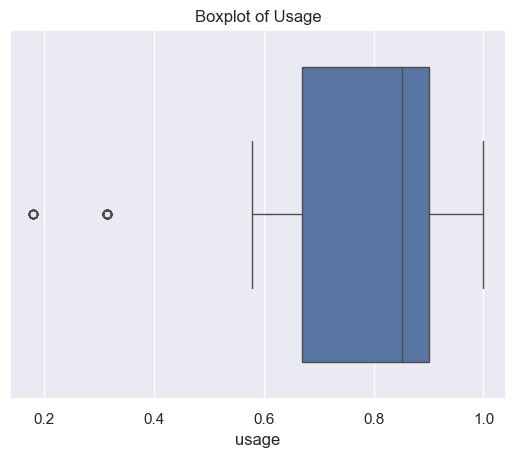

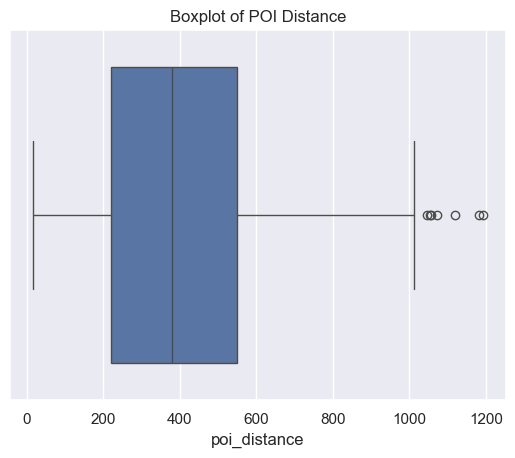

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for 'usage'
sns.boxplot(x=joined_df['usage'])
plt.title('Boxplot of Usage')
plt.show()

# Boxplot for 'poi_distance'
sns.boxplot(x=joined_df['poi_distance'])
plt.title('Boxplot of POI Distance')
plt.show()


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization.


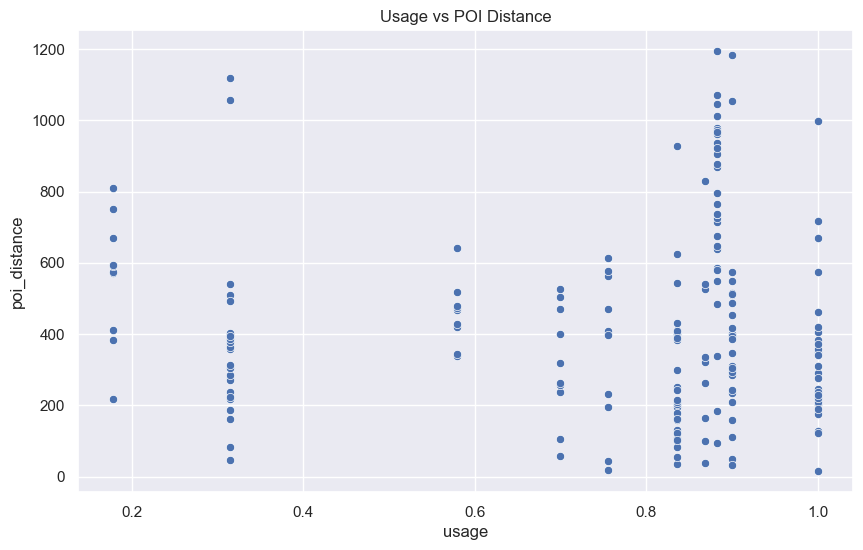

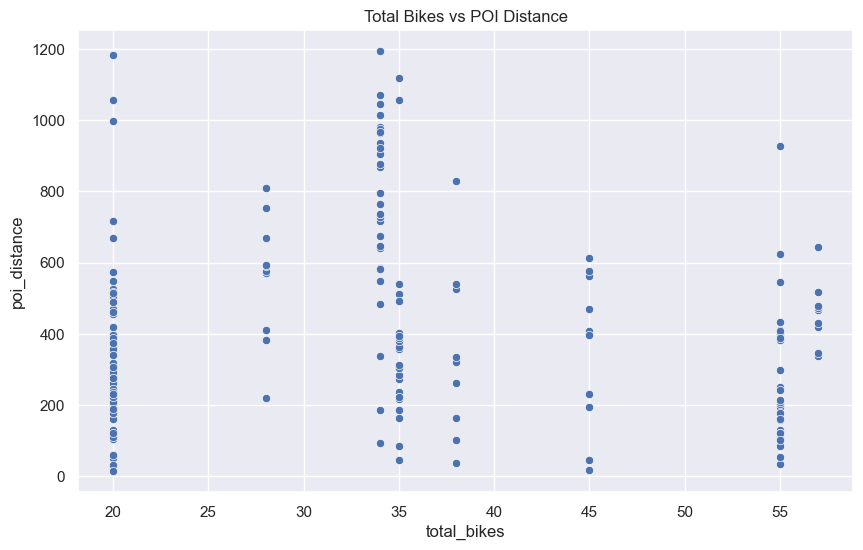

In [7]:
# Scatterplot for Usage vs POI Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=joined_df, x='usage', y='poi_distance')
plt.title('Usage vs POI Distance')
plt.show()

# Scatterplot for Total Bikes vs POI Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=joined_df, x='total_bikes', y='poi_distance')
plt.title('Total Bikes vs POI Distance')
plt.show()


### EDA results:

In summary, the boxplots give us a view of the distribution of individual variables, while the scatterplots are meant to identify potential relationships between variables. From these plots, it can be inferred that there is no immediately apparent correlation between the usage or total bikes and the POI distance, as the data does not display any distinct pattern of association. However, further statistical analysis would be required to confirm this.


# Database


Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)


In [15]:
import sqlite3

# Database connection
conn = sqlite3.connect('points_of_interest.db')
joined_df.to_sql('poi', conn, index=False, if_exists='replace')

# Validate data insertion. And count the total number of distinct stations
cursor = conn.cursor()
cursor.execute(
    "SELECT COUNT(DISTINCT station) FROM poi")
rows = cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()


(10,)


Look at the data before and after the join to validate your data.


In [16]:
# Load DataFrames
df1 = pd.read_csv('FourSquarePOI.csv')
df2 = pd.read_csv('YelpPOI.csv')

# Validate columns of both DataFrames
print("Columns in Foursquare DataFrame:", df1.columns)
print("Columns in Yelp DataFrame:", df2.columns)

# Joining the data (vertically)
joined_df = pd.concat([df1, df2], ignore_index=True)

# Checking Data Types
print("\nData Types:\n", joined_df.dtypes)

# Checking for Null Values
print("\nNull Values:\n", joined_df.isnull().sum())


Columns in Foursquare DataFrame: Index(['station', 'usage', 'total_bikes', 'poi_name', 'poi_distance',
       'poi_address'],
      dtype='object')
Columns in Yelp DataFrame: Index(['station', 'usage', 'total_bikes', 'poi_name', 'poi_distance',
       'poi_address'],
      dtype='object')

Data Types:
 station          object
usage           float64
total_bikes       int64
poi_name         object
poi_distance    float64
poi_address      object
dtype: object

Null Values:
 station         0
usage           0
total_bikes     0
poi_name        0
poi_distance    0
poi_address     0
dtype: int64
